In [1]:
#Rungie Kutta that is totally typed out that at least runs.
#
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.constants as sci
import math

In [2]:
def Truncate( number, digits = 2 ):
    #radixPosition = str( number ).find( '.' )
    #exponentialPosition = str( number ).find( 'e' )
    #if radixPosition != ( -1 ):
    #    numberBuffer = str( number )[ 0 : radixPosition + digits ]
    #    #print( numberBuffer )
    #    if exponentialPosition != ( -1 ):
    #        numberBuffer += str( number )[ exponentialPosition : ]
    #    number = np.float64( numberBuffer )
    #if number == 0.0:
    #    number = .1
    #try:
    #    number = np.float64( int( number ) )
    #except:
    #    number = 1.0
    #print( number )
    return number

In [18]:

def LengthVelocity( previousLengthVelocity ):
    return Truncate( previousLengthVelocity )

def AngleVelocity( previousAngleVelocity ):
    return Truncate( previousAngleVelocity )

def LengthAcceleration( length, angle, angleVelocity, springConstant, mass, gravity, initialLength ):
    return Truncate( length ) * Truncate( angleVelocity ) ** 2 - Truncate( springConstant / mass ) * ( Truncate( length ) - Truncate( initialLength ) ) + ( Truncate( gravity ) * Truncate( np.cos( Truncate( angle ) ) ) )

def AngleAcceleration( length, angle, lengthVelocity, angleVelocity, gravity ):
    return ( ( -gravity ) / Truncate( length ) ) * Truncate( np.sin( Truncate( angle ) ) ) - ( 2.0 / Truncate( length ) ) * Truncate( lengthVelocity ) * Truncate( angleVelocity )

def Spring( step, timeEnd, mass = .04, springConstant = 100, initialLength = .3, initialAngle = .4, initialLengthVelocity = 0.0, initialAngleVelocity = 0.0 ):
    time = 0
    lengthZero = 0.2
    gravity = 9.8
    cells = int( np.ceil( timeEnd / step ) )
    length = np.zeros( cells + 1, dtype = np.longfloat )
    angle = np.zeros( cells + 1, dtype = np.longfloat )
    lengthVelocity = np.zeros( cells + 1, dtype = np.longfloat )
    angleVelocity = np.zeros( cells + 1, dtype = np.longfloat )
    time = np.zeros( cells + 1, dtype = np.longfloat )
    x = np.zeros( cells + 1, dtype = np.longfloat )
    y = np.zeros( cells + 1, dtype = np.longfloat )
    length[ 0 ] = initialLength
    angle[ 0 ] = initialAngle
    lengthVelocity[ 0 ] = initialLengthVelocity
    angleVelocity[ 0 ] = initialAngleVelocity
    x[ 0 ] = length[ 0 ] * np.sin( angle[ 0 ] )
    y[ 0 ] = 1.0 - length[ 0 ] * np.cos( angle[ 0 ] )
    for i in range( cells ):
        #print( '<k1>' )
        k1Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] ) )
        k1Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] ) )
        k1LengthVelocity = Truncate( step * LengthAcceleration( length[ i ], angle[ i ], angleVelocity[ i ], springConstant, mass, gravity, initialLength ) )
        k1AngleVelocity = Truncate( step * AngleAcceleration( length[ i ], angle[ i ], lengthVelocity[ i ], angleVelocity[ i ], gravity ) )
        #print( '</k1>' )
        #########################################
        #print( '<k2>' )
        k2Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k1Length / 2.0 ) )
        k2Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k1AngleVelocity  / 2.0 ) )
        k2LengthVelocity = Truncate( step * LengthAcceleration( ( length[ i ] + k1LengthVelocity ) / 2.0, ( angle[ i ] + k1AngleVelocity ) / 2.0, ( angleVelocity[ i ] ), springConstant, mass, gravity, initialLength ) )
        k2AngleVelocity = Truncate( step * AngleAcceleration( ( length[ i ] + k1LengthVelocity ) / 2.0, ( angle[ i ] + k1AngleVelocity ) / 2.0, ( lengthVelocity[ i ] ), ( angleVelocity[ i ] ), gravity ) )
        #print( '</k2>' )
        #########################################
        #print( '<k3>' )
        k3Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k2Length / 2.0 ) )
        k3Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k2AngleVelocity / 2.0 ) )
        k3LengthVelocity = Truncate( step * LengthAcceleration( ( length[ i ] + k2LengthVelocity ) / 2.0, ( angle[ i ] + k2AngleVelocity ) / 2.0, ( angleVelocity[ i ] ), springConstant, mass, gravity, initialLength ) )
        k3AngleVelocity = Truncate( step * AngleAcceleration( ( length[ i ] + k2LengthVelocity ) / 2.0, ( angle[ i ] + k2AngleVelocity ) / 2.0, ( lengthVelocity[ i ] ), ( angleVelocity[ i ] ), gravity ) )
        #print( '</k3>' )
        #########################################
        #print( '<k4>' )
        k4Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k3Length ) )
        k4Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k3AngleVelocity ) )
        k4LengthVelocity = Truncate( step * LengthAcceleration( length[ i ] + k3LengthVelocity, angle[ i ] + k3AngleVelocity, angleVelocity[ i ], springConstant, mass, gravity, initialLength ) )
        k4AngleVelocity = Truncate( step * AngleAcceleration( length[ i ] + k3LengthVelocity, angle[ i ] + k3AngleVelocity, lengthVelocity[ i ], angleVelocity[ i ], gravity ) )
        #print( '</k4>' )
        #########################################
        #print( '<taylor>' )
        length[ i + 1 ] = Truncate( ( length[ i ] + ( k1Length + 2.0 * ( k2Length + k3Length ) + k4Length ) / 6.0 ) )
        angle[ i + 1 ] = Truncate( ( ( angle[ i ] + ( k1Angle + 2.0 * ( k2Angle + k3Angle ) + k4Angle ) / 6.0 ) ) )
        lengthVelocity[ i + 1 ] = Truncate( lengthVelocity[ i ] + ( k1LengthVelocity + 2.0 * ( k2LengthVelocity + k3LengthVelocity ) + k4LengthVelocity ) / 6.0 )
        angleVelocity[ i + 1 ] = Truncate( angleVelocity[ i ] + ( k1AngleVelocity + 2.0 * ( k2AngleVelocity + k3AngleVelocity ) + k4AngleVelocity ) / 6.0 )
        #print( '</taylor>' )
        #########################################
        #print( '<xyt>' )
        x[ i + 1 ] = Truncate( length[ i + 1 ] * np.sin( angle[ i + 1 ] ) )
        y[ i + 1 ] = Truncate( 1.0 - length[ i + 1 ] * np.cos( angle[ i + 1 ] ) )
        time[ i + 1 ] = step + time[ i ]
        #print( '</xyt>' )
    fig = plt.figure()
    ax = fig.gca( projection = '3d' )
    plt.plot( x, y, time )
    plt.show()


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


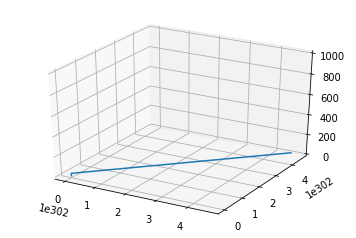

In [20]:
Spring( 1, 1000 )#, 4, 100, 3, 4, 1.0, 2.0 )

Hey,

I've been looking at a lot of folk's Runge-Kutta codes. The most common mistake is to do something wrong with the k's . . . to add the wrong one.

Lot of people are doing this

k1L = h * Ldot(vLvec[i]); -- which is fine

k1vL = h * vLdot(stuff) - also fine 

k2L = h * vLdot(vLvec[i] + k1L/2.0) -- which is not fine . . . see you added k1L/2.0 and should have added k1vL/2.0 . . . 

Same thing with the other functions - make sure that you are adding the right k.

Also - note that in Runge-Kutta, the k4's take the full k3

k4L = h * Ldot(vLvec[i] + k3vL) - is correct . . . dividing by 2.0 on the k3vL is not correct.

For the most part, I got people's code to work if I fixed all the mistakes of this type.

tpk

In [29]:
#Old Code

def LengthVelocity( previousLengthVelocity ):
    return Truncate( previousLengthVelocity )

def AngleVelocity( previousAngleVelocity ):
    return Truncate( previousAngleVelocity )

def LengthAcceleration( length, angle, angleVelocity, springConstant, mass, gravity, initialLength ):
    return Truncate( length ) * Truncate( angleVelocity ) ** 2 - Truncate( springConstant / mass ) * ( Truncate( length ) - Truncate( initialLength ) ) + ( Truncate( gravity ) * Truncate( np.cos( Truncate( angle ) ) ) )

def AngleAcceleration( length, angle, lengthVelocity, angleVelocity, gravity ):
    return ( ( -gravity ) / Truncate( length ) ) * Truncate( np.sin( Truncate( angle ) ) ) - ( 2.0 / Truncate( length ) ) * Truncate( lengthVelocity ) * Truncate( angleVelocity )

def Spring( step, timeEnd, mass = .04, springConstant = 100, initialLength = .3, initialAngle = .4, initialLengthVelocity = 0.0, initialAngleVelocity = 0.0 ):
    time = 0
    lengthZero = 0.2
    gravity = 9.8
    cells = int( np.ceil( timeEnd / step ) )
    length = np.zeros( cells + 1, dtype = np.longfloat )
    angle = np.zeros( cells + 1, dtype = np.longfloat )
    lengthVelocity = np.zeros( cells + 1, dtype = np.longfloat )
    angleVelocity = np.zeros( cells + 1, dtype = np.longfloat )
    time = np.zeros( cells + 1, dtype = np.longfloat )
    x = np.zeros( cells + 1, dtype = np.longfloat )
    y = np.zeros( cells + 1, dtype = np.longfloat )
    length[ 0 ] = initialLength
    angle[ 0 ] = initialAngle
    lengthVelocity[ 0 ] = initialLengthVelocity
    angleVelocity[ 0 ] = initialAngleVelocity
    x[ 0 ] = length[ 0 ] * np.sin( angle[ 0 ] )
    y[ 0 ] = 1.0 - length[ 0 ] * np.cos( angle[ 0 ] )
    for i in range( cells ):
        #print( '<k1>' )
        k1Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] ) )
        k1Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] ) % 360.0 )
        k1LengthVelocity = Truncate( step * LengthAcceleration( length[ i ], angle[ i ], angleVelocity[ i ], springConstant, mass, gravity, initialLength ) )
        k1AngleVelocity = Truncate( step * AngleAcceleration( length[ i ], angle[ i ], lengthVelocity[ i ], angleVelocity[ i ], gravity ) )
        #print( '</k1>' )
        #########################################
        #print( '<k2>' )
        k2Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k1Length / 2.0 ) )
        k2Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k1AngleVelocity  / 2.0 ) % 360.0 )
        k2LengthVelocity = Truncate( step * LengthAcceleration( length[ i ] + k1LengthVelocity / 2.0, angle[ i ] + k1AngleVelocity / 2.0, angleVelocity[ i ] + k1AngleVelocity / 2.0, springConstant, mass, gravity, initialLength ) )
        k2AngleVelocity = Truncate( step * AngleAcceleration( length[ i ] + k1LengthVelocity / 2.0, angle[ i ] + k1AngleVelocity / 2.0, lengthVelocity[ i ] + k1LengthVelocity / 2.0, angleVelocity[ i ] + k1AngleVelocity / 2.0, gravity ) )
        #print( '</k2>' )
        #########################################
        #print( '<k3>' )
        k3Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k2Length / 2.0 ) )
        k3Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k2AngleVelocity / 2.0 ) % 360.0 )
        k3LengthVelocity = Truncate( step * LengthAcceleration( length[ i ] + k2LengthVelocity / 2.0, angle[ i ] + k2AngleVelocity / 2.0, angleVelocity[ i ] + k2AngleVelocity / 2.0, springConstant, mass, gravity, initialLength ) )
        k3AngleVelocity = Truncate( step * AngleAcceleration( length[ i ] + k2LengthVelocity / 2.0, angle[ i ] + k2AngleVelocity / 2.0, lengthVelocity[ i ] + k2LengthVelocity / 2.0, angleVelocity[ i ] + k2AngleVelocity / 2.0, gravity ) )
        #print( '</k3>' )
        #########################################
        #print( '<k4>' )
        k4Length = Truncate( step * LengthVelocity( lengthVelocity[ i ] + k3Length ) )
        k4Angle = Truncate( step * AngleVelocity( angleVelocity[ i ] + k3AngleVelocity ) % 360.0 )
        k4LengthVelocity = Truncate( step * LengthAcceleration( length[ i ] + k3LengthVelocity, angle[ i ] + k3AngleVelocity, angleVelocity[ i ] + k1AngleVelocity, springConstant, mass, gravity, initialLength ) )
        k4AngleVelocity = Truncate( step * AngleAcceleration( length[ i ] + k3LengthVelocity, angle[ i ] + k3AngleVelocity, lengthVelocity[ i ] + k3LengthVelocity, angleVelocity[ i ] + k3AngleVelocity, gravity ) )
        #print( '</k4>' )
        #########################################
        #print( '<taylor>' )
        length[ i + 1 ] = Truncate( ( length[ i ] + ( k1Length + 2.0 * ( k2Length + k3Length ) + k4Length ) / 6.0 ) )
        angle[ i + 1 ] = Truncate( ( ( angle[ i ] + ( k1Angle + 2.0 * ( k2Angle + k3Angle ) + k4Angle ) / 6.0 ) % 360.0 ) )
        lengthVelocity[ i + 1 ] = Truncate( lengthVelocity[ i ] + ( k1LengthVelocity + 2.0 * ( k2LengthVelocity + k3LengthVelocity ) + k4LengthVelocity ) / 6.0 )
        angleVelocity[ i + 1 ] = Truncate( angleVelocity[ i ] + ( k1AngleVelocity + 2.0 * ( k2AngleVelocity + k3AngleVelocity ) + k4AngleVelocity ) / 6.0 )
        #print( '</taylor>' )
        #########################################
        #print( '<xyt>' )
        x[ i + 1 ] = Truncate( length[ i + 1 ] * np.sin( angle[ i + 1 ] ) )
        y[ i + 1 ] = Truncate( 1.0 - length[ i + 1 ] * np.cos( angle[ i + 1 ] ) )
        time[ i + 1 ] = step + time[ i ]
        #print( '</xyt>' )
    fig = plt.figure()
    ax = fig.gca( projection = '3d' )
    plt.plot( x, y, time )
    plt.show()


In [30]:
Spring( 1, 1000 )

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


ValueError: cannot convert float NaN to integer